# Convolutional Neural Network

### Importing the libraries

In [40]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
tf.__version__

'1.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Product/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3200 images belonging to 4 classes.


### Preprocessing the Test set

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Product/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 800 images belonging to 4 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [44]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [46]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [47]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [48]:
cnn.add(tf.keras.layers.Dense(units=20, activation='relu'))

### Step 5 - Output Layer

In [49]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [50]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [51]:
epochs=5
history=cnn.fit(x = training_set, validation_data = test_set, epochs = epochs)

Epoch 1/5
100/100 [==============================] - 43s 435ms/step - loss: 0.8390 - categorical_accuracy: 0.6506 - val_loss: 0.4025 - val_categorical_accuracy: 0.7500
Epoch 2/5
100/100 [==============================] - 41s 413ms/step - loss: 0.3186 - categorical_accuracy: 0.7797 - val_loss: 0.2339 - val_categorical_accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 43s 429ms/step - loss: 0.1717 - categorical_accuracy: 0.9847 - val_loss: 0.0654 - val_categorical_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 47s 468ms/step - loss: 0.0369 - categorical_accuracy: 1.0000 - val_loss: 0.0120 - val_categorical_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 41s 408ms/step - loss: 0.0124 - categorical_accuracy: 1.0000 - val_loss: 0.0076 - val_categorical_accuracy: 1.0000


### Drawing Accuracy vs Epoch and Loss vs Epoch

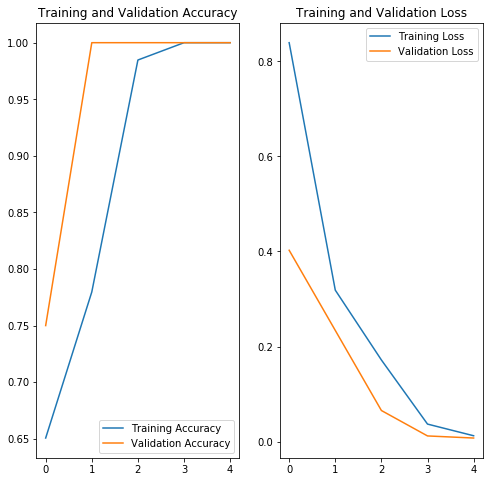

In [53]:
cnn.save('Product.h5')
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()